## VGG Initialization

In [1]:
import numpy as np
%pylab inline
# TORCH!
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
from torch.autograd import Variable
# Torch model zoo
import torchvision as tv
import torchvision.transforms as transforms
import torchvision.models as models
vgg16pre = models.vgg16(pretrained=True)

## PRELIMINARIES ##
# To show python tensor images
def imshow(img):
    if len(img.shape) == 4:
        img = tv.utils.make_grid(img)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


Populating the interactive namespace from numpy and matplotlib


In [2]:
vgg16pre

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

## Load Data

In [42]:
datadir = '/Users/zaharia/Downloads/tiny-imagenet-200/'

# LOAD CLASS LABELS
labelset = {}
with open(datadir + "words.txt") as f:
    for line in f:
       (key, val) = line.rstrip().split(None,1)
       labelset[key] = val

# Convert class codes to actual labels, e.g. labels[trainset.classes[2]]
def idx2label(s,i):
    if not isinstance(i,int) and i.numel()>1: # Recurse
        i = i.data
        labs = [idx2label(s,ii) for ii in i]
    else:
        labs = labelset[s.classes[i]]
    return labs

In [4]:
# To transform PIL (jpeg) images into Python tensors, normalized with 0.5 mean & std
transform = transforms.Compose(
    [transforms.Resize(224), # TO MATCH VGG16 input. should use 224x224 images directly instead
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load training data
trainset = tv.datasets.ImageFolder(datadir + 'train/',transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=4,
                                          shuffle=False,
                                          num_workers=2)


2
bullfrog, Rana catesbeiana


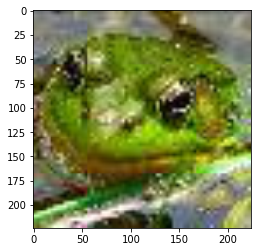

In [5]:
# Inspect loaded data
print(trainset[1001][1])
print(idx2label(trainset,trainset[1001][1])) # ==> print(labels[trainset.classes[trainset[1001][1]]])
imshow(trainset[1001][0])

In [6]:
trainiter = iter(trainloader)
images,labels = trainiter.next()

['goldfish, Carassius auratus',
 'goldfish, Carassius auratus',
 'goldfish, Carassius auratus',
 'goldfish, Carassius auratus']

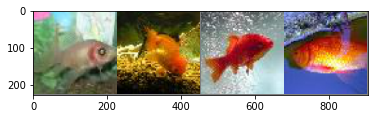

In [45]:
imshow(images)
idx2label(trainset,labels)

## Evaluate model on images

In [8]:
#vgg16pre.eval()
#randin = torch.randn(4,3,224,224)
#inputs, labels = Variable(images), Variable(labels)
outputs = vgg16pre(images)

In [9]:
_, predicted = torch.max(outputs,1)
print('Predicted: ', ' '.join('%5s' % idx2label(trainset,predicted.data[j])
                              for j in range(4)))

TypeError: len() of a 0-d tensor

1